In [30]:
#Data processing 
import numpy as np
import pandas as pd
import scipy as sp

#machine learning
from sklearn import preprocessing

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [31]:
data = pd.read_csv('/Users/tongtong9078/Desktop/EDF-1.b-master/DATA/UCL_DATA.csv')

In [32]:
'''Data Description

GSP_CODE => Network (geographic) region of the customer

EAC => Annual average consumption in MWh (1000千瓦时)

FIRST_CHANNEL => Channel in which customer entered portfolio
        Direct - internal Sales channels
        Broker - external independent energy brokers
        Deemed/ Tariff - legacy customers
        
LAST_RENEWAL_CHANNEL => Channel in which customer last renewed

TENURE => Number of years customer is in the portfolio

RENEWALS => Number of times customer renewed contract

SIC_CODE => Standard Industry Code
        9999 or 0 - not available

DELPHI => Credit score
        -1 or blank - not available
        0-100 - low to high


PRODUCT_LENGTH_BEFORE_RENEWAL => Contract duration before last renewal

PRODUCT_LENGTH_AFTER_RENEWAL => Contract duration after last renewal
        0 - less than one year
        1-4 - one to four years
        99 - contract with no end date (variable tariff)



PRODUCT_CAT_BEFORE_RENEWAL => Product before last renewal

PRODUCT_CATEGORY_AFTER_RENEWAL => Product after last renewal
        BP - fixed-price product
        BF - auto-rollover product
        FB01 - variable tariff
        COT - customer moved out of property
        Portfolio or Contract Loss - customer did not renew contract

METER_TYPE => Meter type

DEBT_LENGTH => Number of months customer is in debt
        0 or blank - customer has no debt
'''
data.head(30)

,EDF_REF,GSP_CODE,EAC,FIRST_CHANNEL,LAST_RENEWAL_CHANNEL,TENURE,RENEWALS,SIC_CODE,DELPHI,PRODUCT_LENGTH_BEFORE_RENEWAL,PRODUCT_LENGTH_AFTER_RENEWAL,PRODUCT_CAT_BEFORE_RENEWAL,PRODUCT_CATEGORY_AFTER_RENEWAL,METER_TYPE,DEBT_LENGTH
0,AAAaaDAANAAM9wbA,L,10.8,Direct 4,Direct 4,9,7,7481,20,1,1,BF,BF,STD,1
1,AAAaaDAANAAM9wbA,J,4.0,Direct 7,Direct 7,12,5,9999,-1,1,1,BF,BF,EC7,NaN
2,AAAlWPABMAAJJUbA,C,2.4,Tariff,Tariff,23,8,7031,62,1,1,BF,BF,STD,NaN
3,AAAaaDAANAAM9wcA,J,8.9,Tariff,Tariff,15,8,9999,NaN,1,0,BF,PORTFOLIO LOSS,STD,NaN
4,AAA1aKABTAALn3cA,J,14.3,Broker 6,Broker 6,25,3,111,-1,1,1,BF,BF,STD,NaN
5,AAAaaDAANAAM9wcA,J,15.3,Tariff,Tariff,25,7,9999,-1,1,1,BF,BF,EC7,NaN
6,AAAaaDAANAAM9weA,J,1.9,Direct 12,Direct 12,14,5,121,45,1,3,BF,BP,STD,NaN
7,AAA1aKABTAALn3eA,J,44.6,Direct 7,Direct 12,25,5,5530,24,1,1,BP,BP,EC7,NaN
8,AAAlWPABMAAJJUeA,H,4.2,Direct 7,Direct 7,12,6,9999,62,1,1,BF,BF,STD,NaN
9,AAAaaDAANAAM9wfA,H,43.7,NaN,NaN,15,8,9999,5,1,1,BF,BF,STD,NaN


In [33]:
data.dtypes

EDF_REF                            object
GSP_CODE                           object
EAC                               float64
FIRST_CHANNEL                      object
LAST_RENEWAL_CHANNEL               object
TENURE                              int64
RENEWALS                            int64
SIC_CODE                            int64
DELPHI                            float64
PRODUCT_LENGTH_BEFORE_RENEWAL       int64
PRODUCT_LENGTH_AFTER_RENEWAL      float64
PRODUCT_CAT_BEFORE_RENEWAL         object
PRODUCT_CATEGORY_AFTER_RENEWAL     object
METER_TYPE                         object
DEBT_LENGTH                       float64
dtype: object

In [34]:
#prediction
data = data.drop(['EDF_REF'],axis = 1)

In [36]:
#Deal with NaNs
#train_data['date_first_booking_year'].fillna(train_data['date_first_booking_year'].mean(), inplace=True)
data['DELPHI'].fillna(data['DELPHI'].mean(),inplace = True)
data['DEBT_LENGTH'].fillna(data['DEBT_LENGTH'].mean(),inplace = True)
data.head()

,GSP_CODE,EAC,FIRST_CHANNEL,LAST_RENEWAL_CHANNEL,TENURE,RENEWALS,SIC_CODE,DELPHI,PRODUCT_LENGTH_BEFORE_RENEWAL,PRODUCT_LENGTH_AFTER_RENEWAL,PRODUCT_CAT_BEFORE_RENEWAL,PRODUCT_CATEGORY_AFTER_RENEWAL,METER_TYPE,DEBT_LENGTH
0,L,10.8,Direct 4,Direct 4,9,7,7481,20.000000,1,1,BF,BF,STD,1.000000
1,J,4.0,Direct 7,Direct 7,12,5,9999,-1.000000,1,1,BF,BF,EC7,2.290013
2,C,2.4,Tariff,Tariff,23,8,7031,62.000000,1,1,BF,BF,STD,2.290013
3,J,8.9,Tariff,Tariff,15,8,9999,38.083848,1,0,BF,PORTFOLIO LOSS,STD,2.290013
4,J,14.3,Broker 6,Broker 6,25,3,111,-1.000000,1,1,BF,BF,STD,2.290013


In [37]:
data.head()

,GSP_CODE,EAC,FIRST_CHANNEL,LAST_RENEWAL_CHANNEL,TENURE,RENEWALS,SIC_CODE,DELPHI,PRODUCT_LENGTH_BEFORE_RENEWAL,PRODUCT_LENGTH_AFTER_RENEWAL,PRODUCT_CAT_BEFORE_RENEWAL,PRODUCT_CATEGORY_AFTER_RENEWAL,METER_TYPE,DEBT_LENGTH
0,L,10.8,Direct 4,Direct 4,9,7,7481,20.000000,1,1,BF,BF,STD,1.000000
1,J,4.0,Direct 7,Direct 7,12,5,9999,-1.000000,1,1,BF,BF,EC7,2.290013
2,C,2.4,Tariff,Tariff,23,8,7031,62.000000,1,1,BF,BF,STD,2.290013
3,J,8.9,Tariff,Tariff,15,8,9999,38.083848,1,0,BF,PORTFOLIO LOSS,STD,2.290013
4,J,14.3,Broker 6,Broker 6,25,3,111,-1.000000,1,1,BF,BF,STD,2.290013


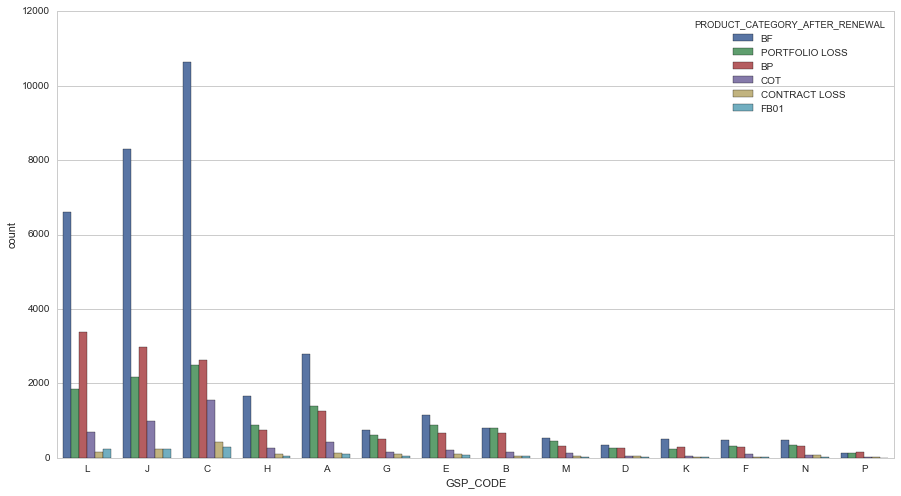

In [44]:
#GSP_CODE 
plt.figure(figsize=(15,8))
sns.countplot(x="GSP_CODE",hue="PRODUCT_CATEGORY_AFTER_RENEWAL", data=data)

In [66]:
data['EAC'].sort_values(axis =0,ascending = False).head()

61304    773.7
63377    664.1
44684    590.7
57823    493.4
32750    482.7
Name: EAC, dtype: float64

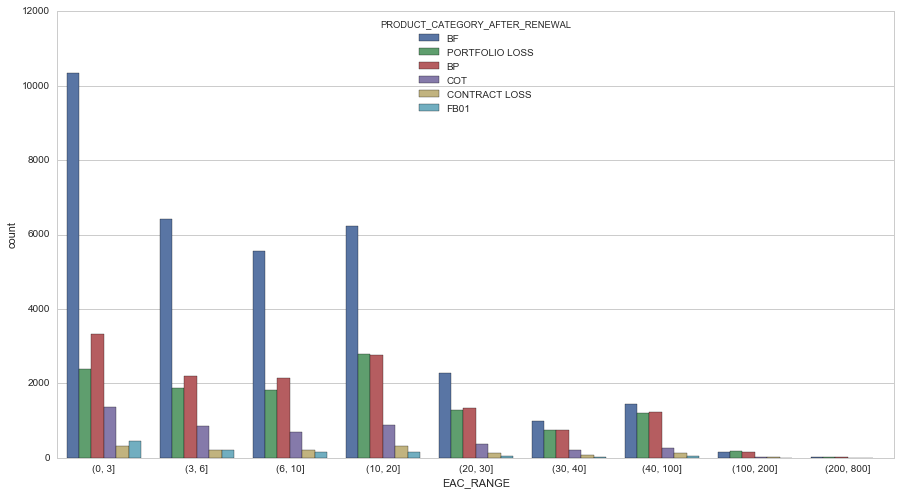

In [61]:
#EAC
data['EAC_RANGE'] = pd.cut(data["EAC"], [0,3,6,10,20,30,40,100,200,800])
plt.figure(figsize=(15,8))
sns.countplot(x="EAC_RANGE",hue="PRODUCT_CATEGORY_AFTER_RENEWAL", data=data)

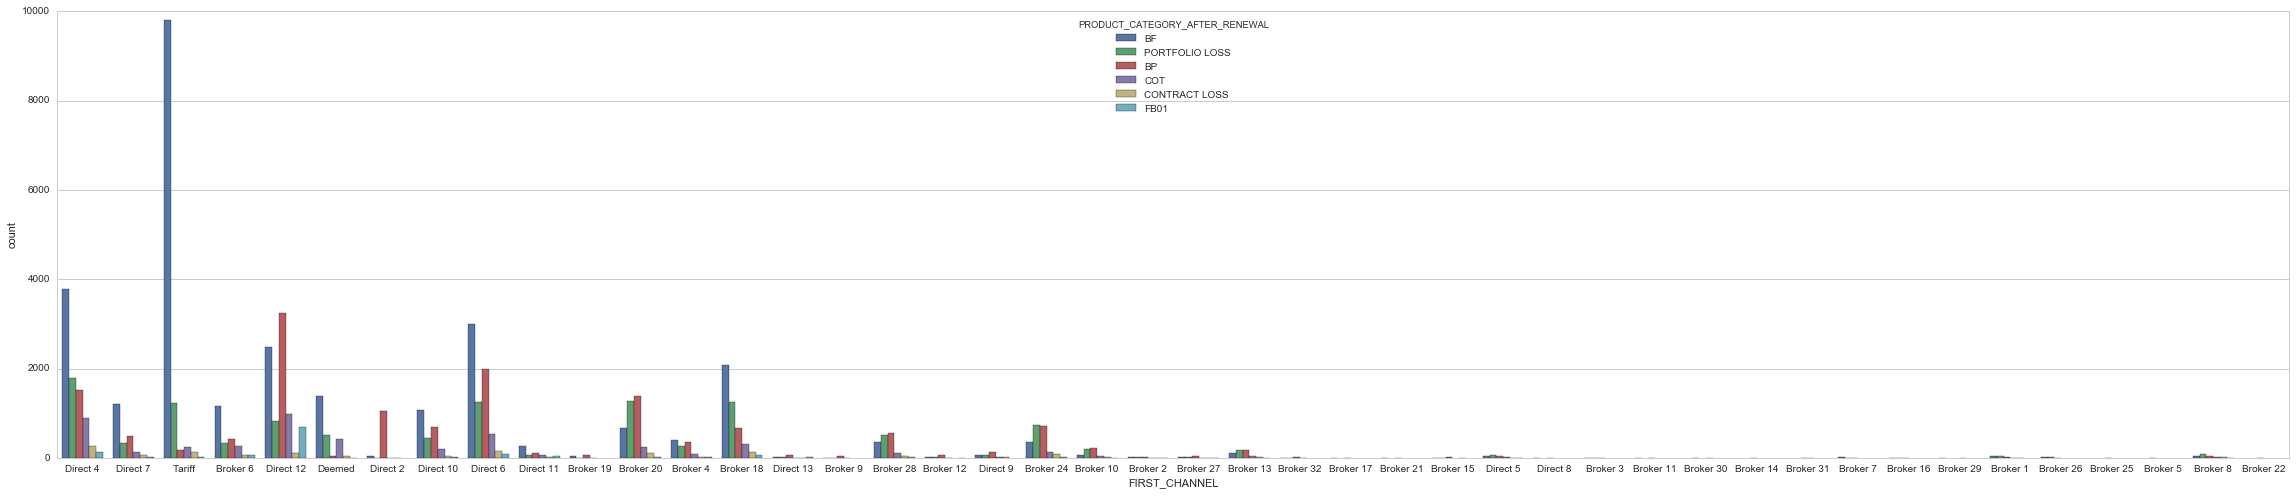

In [65]:
#FIRST_CHANNEL
plt.figure(figsize=(40,8))
sns.countplot(x="FIRST_CHANNEL",hue="PRODUCT_CATEGORY_AFTER_RENEWAL", data=data)

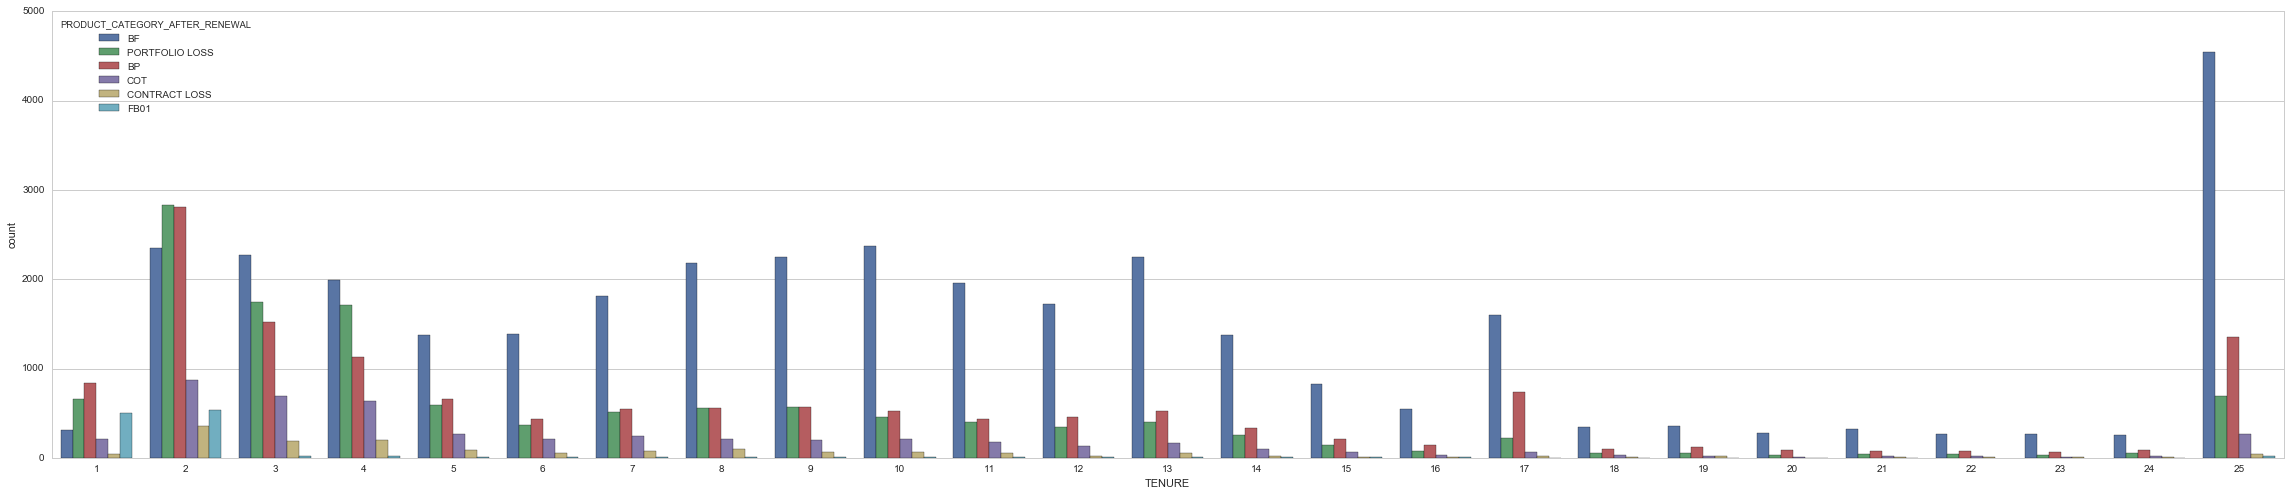

In [68]:
#TENURE
plt.figure(figsize=(40,8))
sns.countplot(x="TENURE",hue="PRODUCT_CATEGORY_AFTER_RENEWAL", data=data)

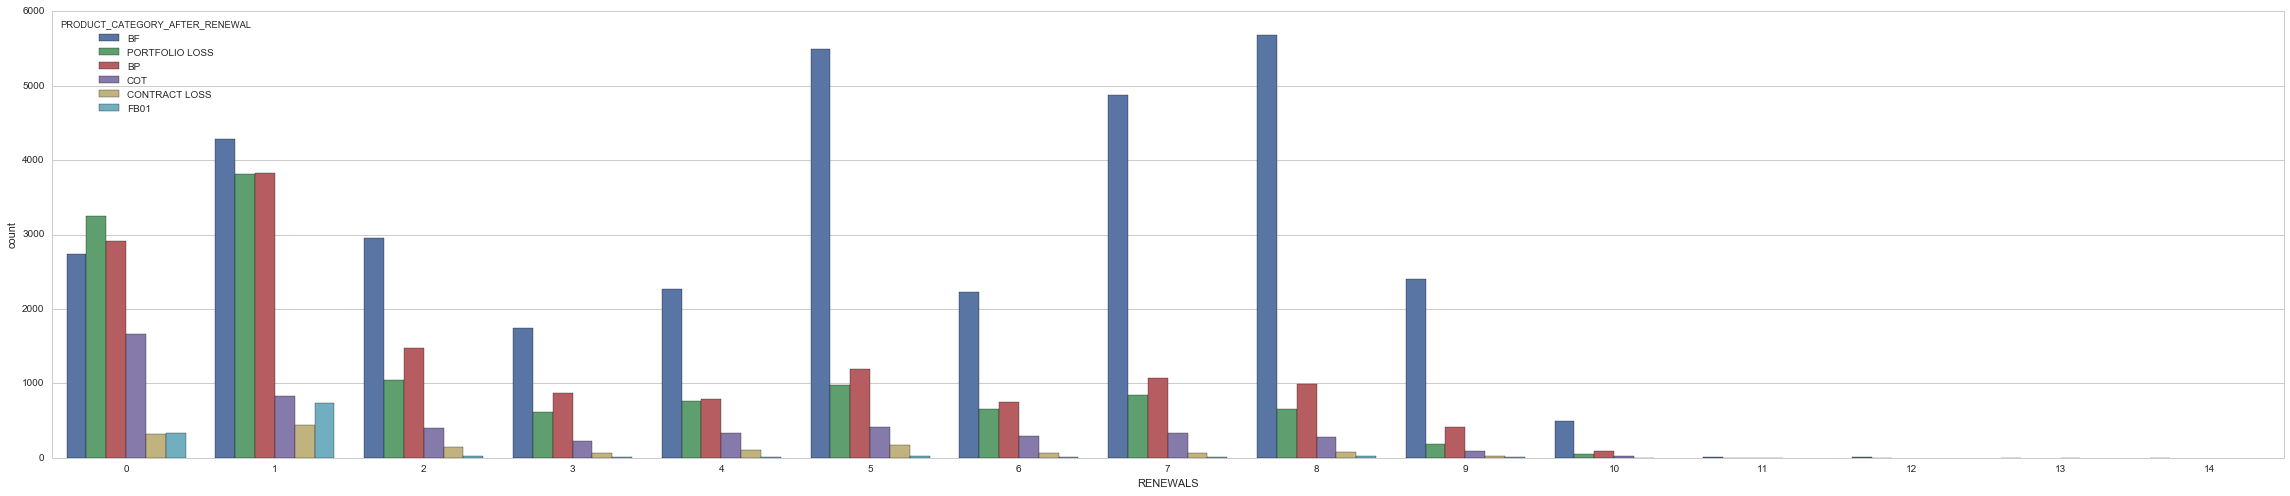

In [69]:
#RENEWALS
plt.figure(figsize=(40,8))
sns.countplot(x="RENEWALS",hue="PRODUCT_CATEGORY_AFTER_RENEWAL", data=data)

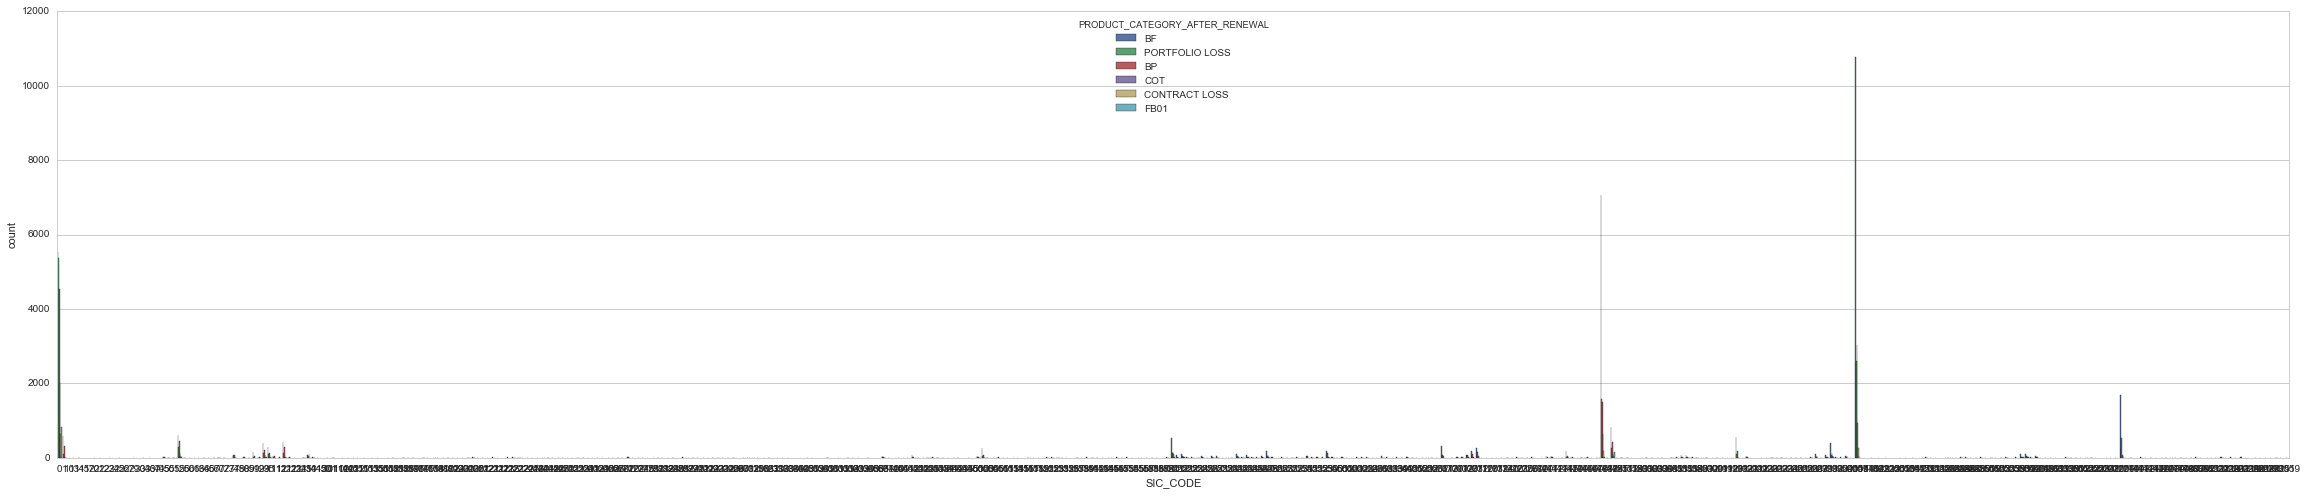

In [70]:
#SIC_CODE
plt.figure(figsize=(40,8))
sns.countplot(x="SIC_CODE",hue="PRODUCT_CATEGORY_AFTER_RENEWAL", data=data)

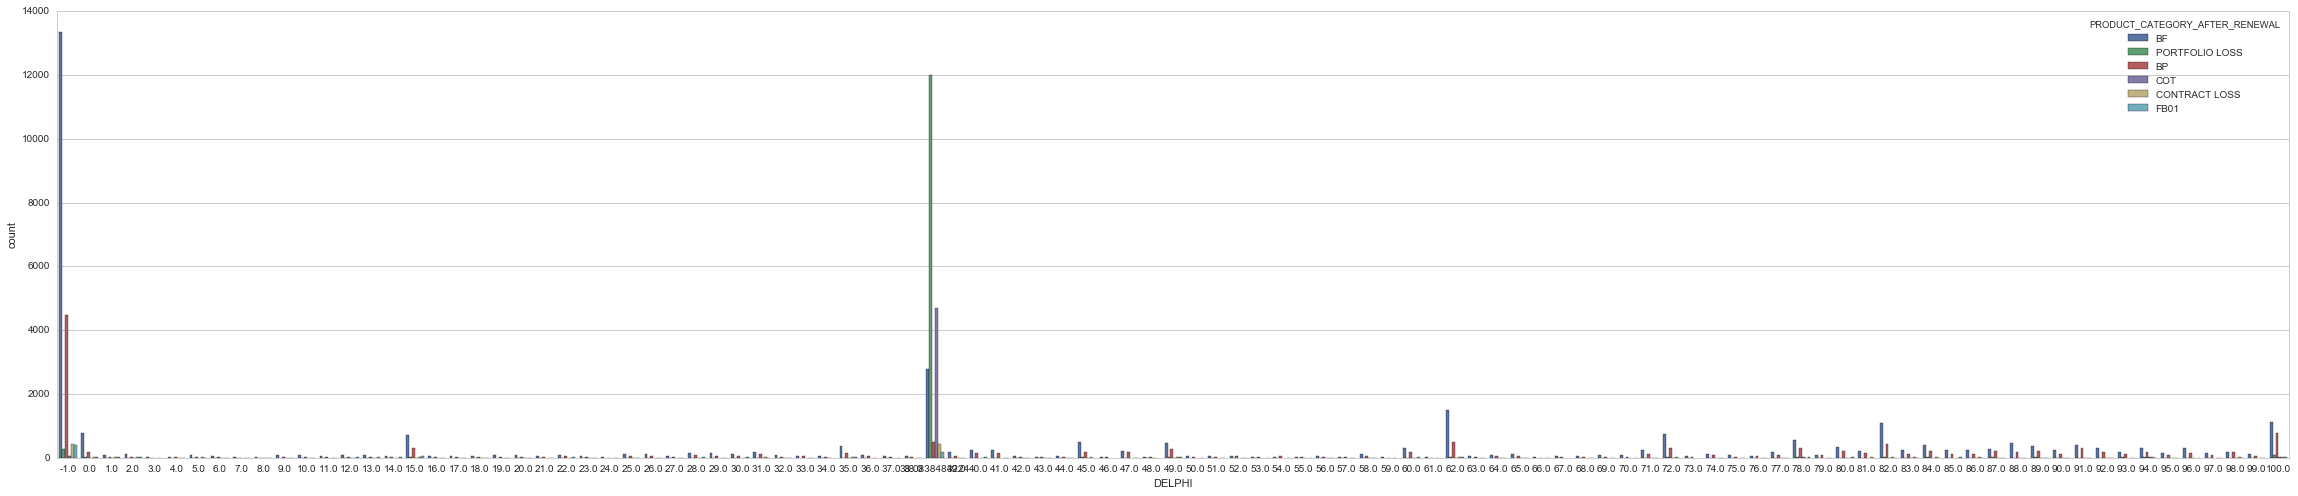

In [19]:
#DELPHI
plt.figure(figsize=(40,8))
sns.countplot(x="DELPHI",hue="PRODUCT_CATEGORY_AFTER_RENEWAL", data=data)

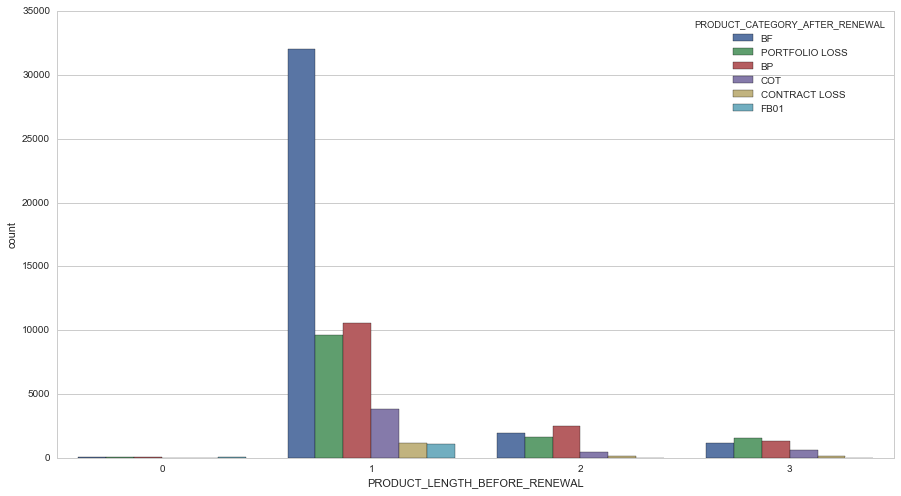

In [17]:
#PRODUCT_LENGTH_BEFORE_RENEWAL
plt.figure(figsize=(15,8))
sns.countplot(x="PRODUCT_LENGTH_BEFORE_RENEWAL",hue="PRODUCT_CATEGORY_AFTER_RENEWAL", data=data)

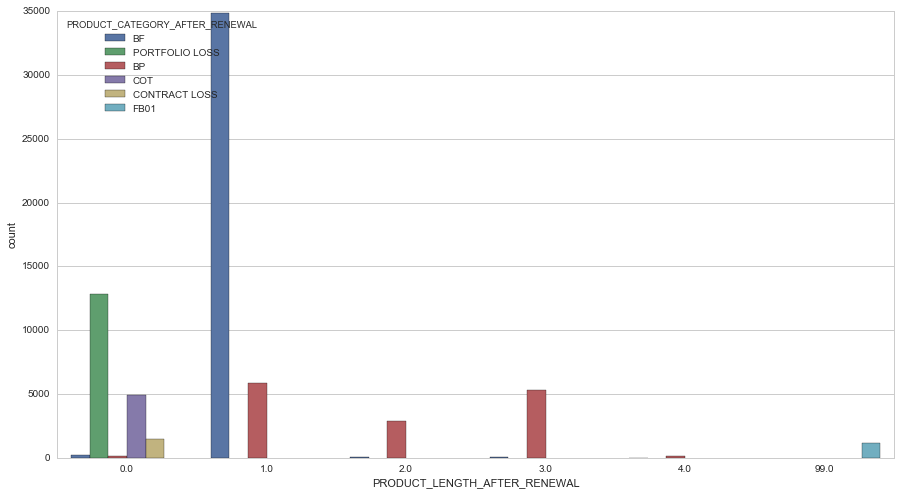

In [20]:
#PRODUCT_LENGTH_AFTER_RENEWAL
plt.figure(figsize=(15,8))
sns.countplot(x="PRODUCT_LENGTH_AFTER_RENEWAL",hue="PRODUCT_CATEGORY_AFTER_RENEWAL", data=data)

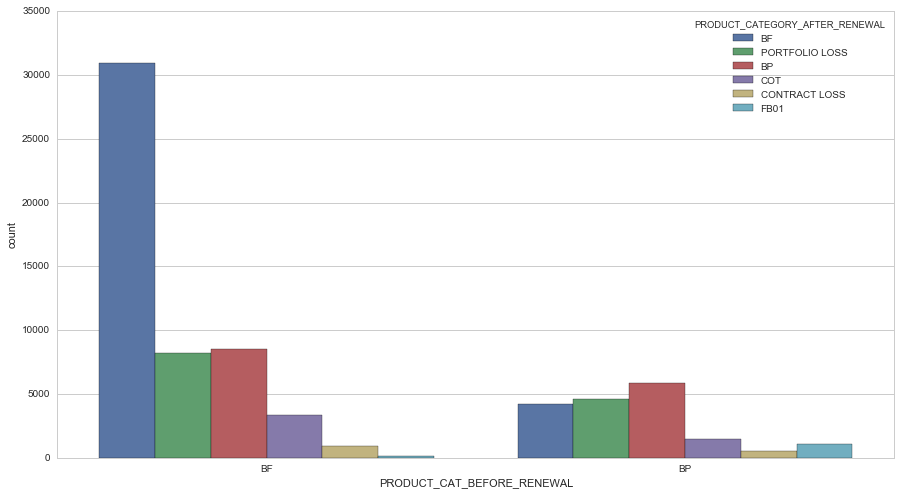

In [23]:
#PRODUCT_CAT_BEFORE_RENEWAL
plt.figure(figsize=(15,8))
sns.countplot(x="PRODUCT_CAT_BEFORE_RENEWAL",hue="PRODUCT_CATEGORY_AFTER_RENEWAL", data=data)

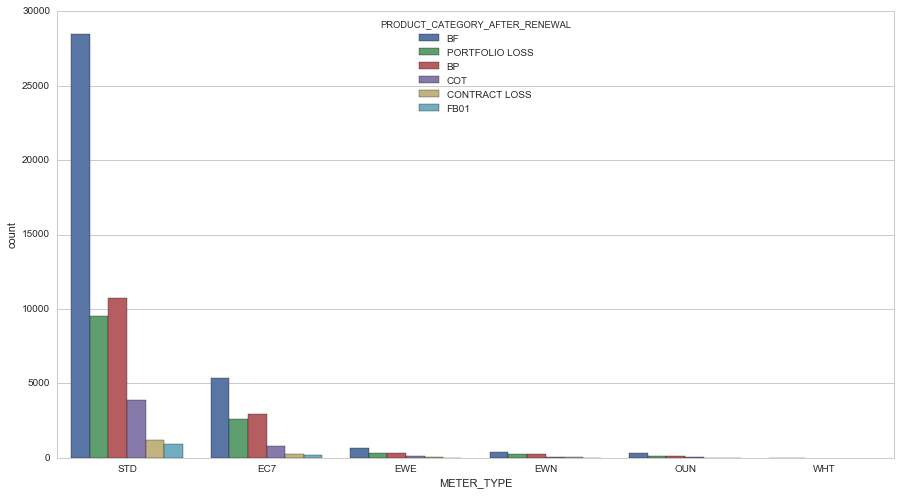

In [24]:
#METER_TYPE
plt.figure(figsize=(15,8))
sns.countplot(x="METER_TYPE",hue="PRODUCT_CATEGORY_AFTER_RENEWAL", data=data)

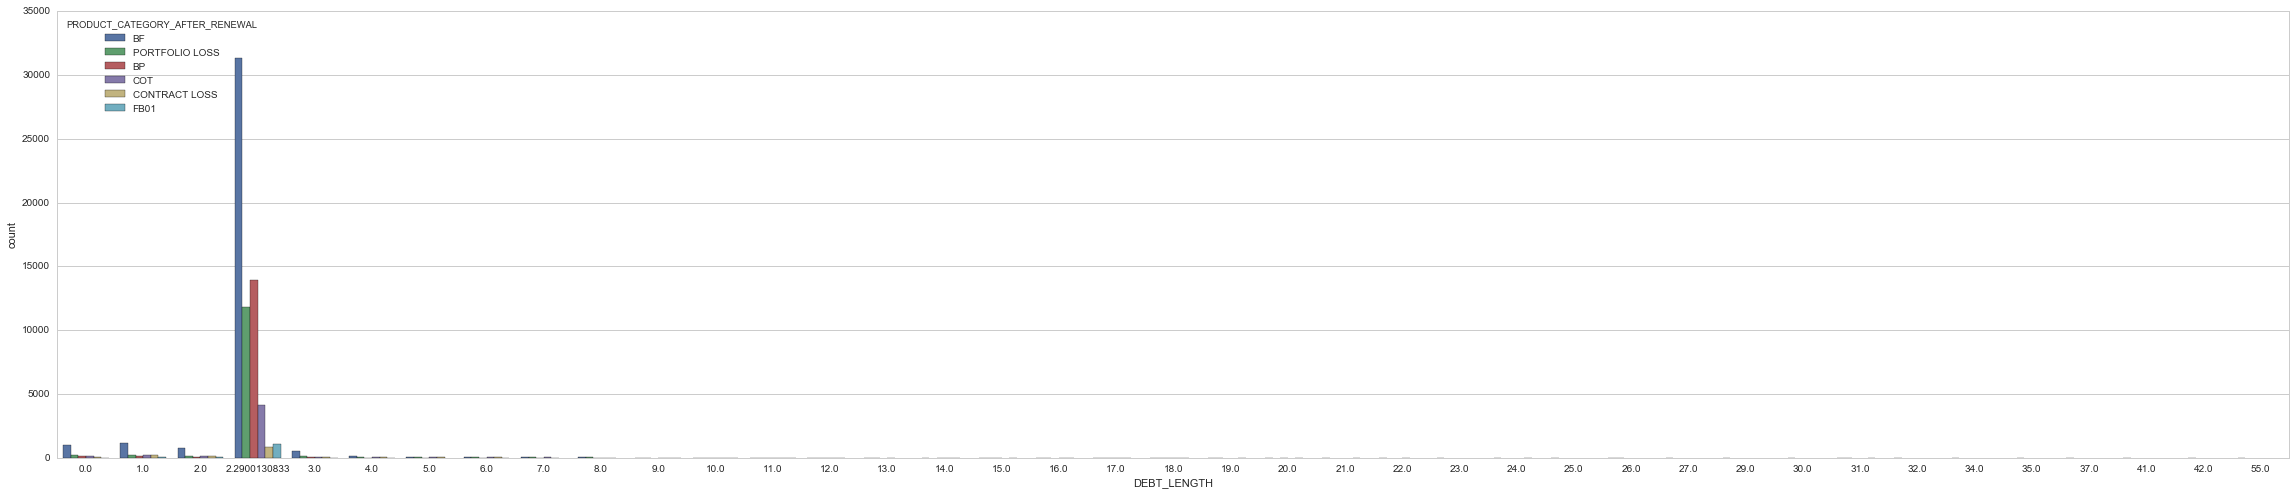

In [26]:
#DEBT_LENGTH
plt.figure(figsize=(40,8))
sns.countplot(x="DEBT_LENGTH",hue="PRODUCT_CATEGORY_AFTER_RENEWAL", data=data)

In [19]:
#Data Preprocessing 
plt.figure(figsize=(15,8))
for i in data.columns:
    if data[i].dtype == 'object':
        label = preprocessing.LabelEncoder()
        label.fit(np.unique(list(data[i].values)))
        data[i] = label.transform(list(data[i].values))  
data.head()

,GSP_CODE,EAC,FIRST_CHANNEL,LAST_RENEWAL_CHANNEL,TENURE,RENEWALS,SIC_CODE,DELPHI,PRODUCT_LENGTH_BEFORE_RENEWAL,PRODUCT_LENGTH_AFTER_RENEWAL,PRODUCT_CAT_BEFORE_RENEWAL,PRODUCT_CATEGORY_AFTER_RENEWAL,METER_TYPE,DEBT_LENGTH
0,10,10.8,37,36,9,7,7481,20.000000,1,1,0,0,4,1.000000
1,8,4.0,40,39,12,5,9999,-1.000000,1,1,0,0,0,2.290013
2,2,2.4,43,42,23,8,7031,62.000000,1,1,0,0,4,2.290013
3,8,8.9,43,42,15,8,9999,38.083848,1,0,0,5,4,2.290013
4,8,14.3,27,26,25,3,111,-1.000000,1,1,0,0,4,2.290013
